In [1]:
import pandas as pd
import os
from utils_classification import *

# MAMI

In [2]:
#txt files with gold labels for MAMI f1 metric
gold_dev_txt = "evaluation/overlapping_classes/golds/MAMI/MAMI_validation_truth.txt"
gold_test_txt = "evaluation/overlapping_classes/golds/EXIST2024/EXIST2024_test_truth.txt"

In [3]:
mami_training_data = "../data/overlapping_classes/MAMI/MAMI_training.json"
mami_val_data = "../data/overlapping_classes/MAMI/MAMI_validation.json"
exist_test_data = "../data/overlapping_classes/EXIST2024/EXIST2024_test.json"

mami_train_df = pd.read_json(mami_training_data,orient='index')
mami_dev_df = pd.read_json(mami_val_data,orient='index')
exist_test_df = pd.read_json(exist_test_data,orient='index')

## Binary Classification

In [4]:
ds_name = "MAMI"
cross_ds_name = "EXIST2024"
evaluation_type = "binary"
model_name = "svm_stylometric_emotion"

In [5]:
#get stylometric emotion features
mami_train = get_stylometric_emotion_features(mami_train_df)
mami_dev = get_stylometric_emotion_features(mami_dev_df)

In [6]:
mami_dev.head()

,text,misogynous,lemmas,upos,pos_fw_emo,count,emotion_associations
10267.jpg,Danny DeVito cooking is the best thing I've se...,0,Danny DeVito cooking is the best thing I 've s...,NOUN NOUN NOUN VERB DET ADJ NOUN PRON VERB VER...,NOUN NOUN NOUN VERB the ADJ NOUN I VERB VERB i...,2,anticipation anticipation
8870.jpg,LONG HAVE I WAITED... FOR MY WIFE TO COME HOME...,0,LONG HAVE I WAITED ... FOR MY WIFE TO COME HOM...,NOUN NOUN PRON VERB . ADP NOUN NOUN NOUN NOUN ...,LONG NOUN I VERB . FOR NOUN NOUN NOUN NOUN NOU...,2,anticipation fear
1662.jpg,A 90 year old Woman dies from #COVID-19 after ...,0,A 90 year old Woman dy from # COVID-19 after r...,DET NUM NOUN ADJ NOUN VERB ADP . NOUN ADP VERB...,A 90 NOUN ADJ NOUN VERB from . NOUN after VERB...,8,positive trust joy positive trust positive ant...
7103.jpg,Get off the table! YOU'RE NOT MY REAL MOM!!!. ...,0,Get off the table ! YOU 'RE NOT MY REAL MOM ! ...,VERB PRT DET NOUN . NOUN VERB VERB NOUN NOUN N...,VERB PRT the NOUN . NOUN VERB VERB NOUN REAL N...,1,positive trust
7142.jpg,"COUPLES BE LIKE: AND I'M ALL LIKE: OH, WATERME...",0,"COUPLES BE LIKE : AND I 'M ALL LIKE : OH , WAT...",ADV NOUN NOUN . CONJ PRON VERB DET NOUN . NOUN...,ADV NOUN NOUN . CONJ I VERB ALL NOUN . NOUN . ...,0,


In [7]:
#find best parameters and train model
clf_svc, vec1, vec2, vec3 = create_binary_classifier_emotion(mami_train,hpt=True)
#make predictions on dev data
y_pred_dev = classify_data_emotion(mami_dev, clf_svc, vec1, vec2, vec3)
#format the predictions for PyEvall function and save the predictions to a JSON file
dev_pred_json,dev_pred_txt = save_evaluation(mami_dev_df, "evaluation/overlapping_classes/predictions", ds_name, "validation", evaluation_type, model_name, y_pred_dev, "misogynous", [])

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: LinearSVC(C=0.1, max_iter=30000, random_state=0)
The best parameter values were: {'C': 0.1}
The best f1-score was: 0.770709537063222
Saved MAMI validation split binary evaluation to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_MAMI_validation_binary.json
Saved MAMI validation split to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_MAMI_validation_answer.txt


----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo (Cross-Dataset):
                precision    recall  f1-score   support

non-mysogynous       0.77      0.73      0.75        66
    misogynous       0.74      0.79      0.76        66

      accuracy                           0.76       132
     macro avg       0.76      0.76      0.76       132
  weighted avg       0.76      0.76      0.76       132

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo (Cross-Dataset):


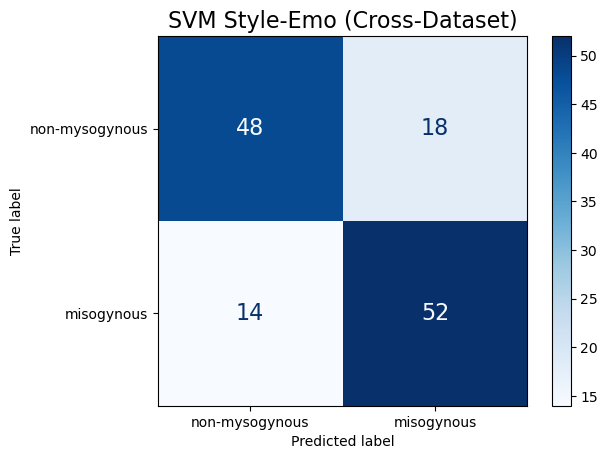

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo (Cross-Dataset):

2025-06-24 16:31:16,240 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-06-24 16:31:16,262 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,276 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:31:16,277 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,292 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,304 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
cargado

In [8]:
y_dev = mami_dev["misogynous"].to_numpy()
gold_path_dev_binary = "evaluation/overlapping_classes/golds/MAMI/MAMI_validation_binary.json"
evaluate_binary_classification(gold_path_dev_binary,dev_pred_json,
                               y_dev,y_pred_dev,
                               ["non-mysogynous","misogynous"],
                               gold_dev_txt,dev_pred_txt,
                               model_name="SVM Style-Emo (Cross-Dataset)")

In [9]:
#get stylometric emotion features
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=["sexist"])
y_test = exist_test[["sexist"]].to_numpy()
#make predictions on test data
y_pred_test = classify_data_emotion(exist_test, clf_svc, vec1, vec2, vec3)

Saved EXIST2024 test split binary evaluation to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.json
Saved EXIST2024 test split to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo (Cross-Dataset):
              precision    recall  f1-score   support

  non-sexist       0.61      0.67      0.64        76
      sexist       0.63      0.57      0.60        76

    accuracy                           0.62       152
   macro avg       0.62      0.62      0.62       152
weighted avg       0.62      0.62      0.62       152

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Sty

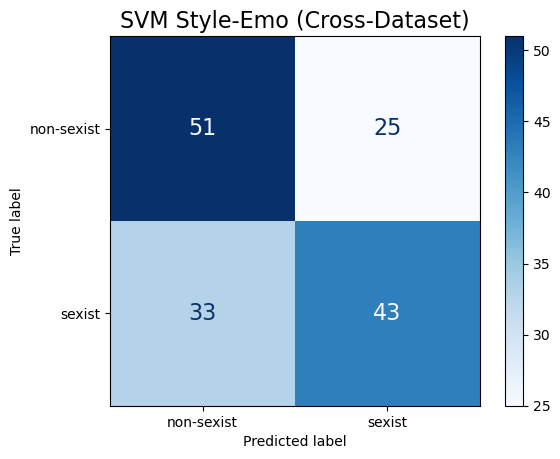

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo (Cross-Dataset):

2025-06-24 16:31:16,568 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-06-24 16:31:16,582 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,598 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:31:16,599 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,614 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:31:16,628 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is

In [10]:
gold_path_test_binary = "evaluation/overlapping_classes/golds/EXIST2024/EXIST2024_test_binary.json"
#create file with predictions
test_pred_json,test_pred_txt = save_evaluation(exist_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, y_pred_test, "sexist", [])
#get evaluation metrics
evaluate_binary_classification(gold_path_test_binary,test_pred_json,
                               y_test,y_pred_test,
                               ["non-sexist","sexist"],
                               gold_test_txt,test_pred_txt,
                               model_name="SVM Style-Emo (Cross-Dataset)")

In [11]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, y_pred_test, ["sexist"], output_path)

Predictions saved to output/cross_dataset/EXIST2024/svm_stylometric_emotion_EXIST2024_test_binary.csv


## Multilabel Classification

### Hierarchical classification with Ensemble in 1st step:

In [11]:
ds_name = "MAMI"
cross_ds_name = "EXIST2024"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_ensemble"
binary_label = "misogynous"
binary_label_cross = "sexist"
mami_fine_grained_labels = ["stereotype","objectification", "violence"]
mami_label_names = ["misogynous","stereotype","objectification", "violence"]
exist_fine_grained_labels = ["stereotyping-dominance","objectification", "sexual-violence"]
exist_label_names = ["sexist","stereotyping-dominance","objectification", "sexual-violence"]

In [12]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/cross_dataset/{cross_ds_name}/ensemble_svm_roberta_robertaswin_{cross_ds_name}_test_binary.csv")
y_pred_binary = binary_preds[f"{binary_label_cross}_prediction"].to_numpy()

In [13]:
#get stylometric emotion features
mami_train = get_stylometric_emotion_features(mami_train_df,label_col=mami_label_names)
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=exist_label_names)

In [14]:
test_positive = exist_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label_cross: y_pred_binary}) 
pred_df[exist_fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = mami_train[mami_train[binary_label] == 1] #only the instances with positive class in binary level

clf=LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                mami_fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, exist_fine_grained_labels] = y_pred_multilabel.toarray() 

In [16]:
y_test_all = exist_test_df[exist_label_names]
gold_path_test_ml = f"evaluation/overlapping_classes/golds/{cross_ds_name}/{cross_ds_name}_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(exist_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, pred_df, binary_label_cross, exist_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   exist_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved EXIST2024 test split hierarchical evaluation to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.json
Saved EXIST2024 test split to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                        precision    recall  f1-score   support

            non-sexist       0.70      0.61      0.65        76
stereotyping-dominance       0.33      0.55      0.41        40
       objectification       0.50      0.58      0.54        43
       sexual-violence       0.25      0.25      0.25        16

             micro avg       0.49      0.55      0.52       175
             macro avg       0.44      0.50      0.46       175
          weighted avg       0.52      0.55      0.53       175
           samples avg       0.53      0.57

2025-06-24 16:33:05,636 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:05,655 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:33:05,656 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:05,676 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:05,694 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.json	-0.6494372110988397	0.31041120308035375	0.4605515013074555

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_EXIST2024_

In [10]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}/ensemble_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, pred_df.to_numpy(), exist_label_names, output_path)

Predictions saved to output/cross_dataset/EXIST2024/ensemble_first_step/svm_stylometric_emotion_w_ensemble_EXIST2024_test_hierarchical.csv


### Hierarchical classification with Ensemble w/ BERT in 1st step:

In [17]:
ds_name = "MAMI"
cross_ds_name = "EXIST2024"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_ensemble_wbert"
binary_label = "misogynous"
binary_label_cross = "sexist"
mami_fine_grained_labels = ["stereotype","objectification", "violence"]
mami_label_names = ["misogynous","stereotype","objectification", "violence"]
exist_fine_grained_labels = ["stereotyping-dominance","objectification", "sexual-violence"]
exist_label_names = ["sexist","stereotyping-dominance","objectification", "sexual-violence"]

In [18]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/cross_dataset/{cross_ds_name}/ensemble_bert_roberta_robertaswin_{cross_ds_name}_test_binary.csv")
y_pred_binary = binary_preds[f"{binary_label_cross}_prediction"].to_numpy()

In [19]:
#get stylometric emotion features
mami_train = get_stylometric_emotion_features(mami_train_df,label_col=mami_label_names)
exist_test = get_stylometric_emotion_features(exist_test_df,label_col=exist_label_names)

In [20]:
test_positive = exist_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label_cross: y_pred_binary}) 
pred_df[exist_fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = mami_train[mami_train[binary_label] == 1] #only the instances with positive class in binary level

clf=LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                mami_fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, exist_fine_grained_labels] = y_pred_multilabel.toarray() 

In [22]:
y_test_all = exist_test_df[exist_label_names]
gold_path_test_ml = f"evaluation/overlapping_classes/golds/{cross_ds_name}/{cross_ds_name}_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(exist_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, pred_df, binary_label_cross, exist_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   exist_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved EXIST2024 test split hierarchical evaluation to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_wbert_EXIST2024_test_hierarchical.json
Saved EXIST2024 test split to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_w_ensemble_wbert_EXIST2024_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                        precision    recall  f1-score   support

            non-sexist       0.72      0.58      0.64        76
stereotyping-dominance       0.33      0.57      0.42        40
       objectification       0.49      0.63      0.55        43
       sexual-violence       0.24      0.25      0.24        16

             micro avg       0.48      0.56      0.52       175
             macro avg       0.44      0.51      0.46       175
          weighted avg       0.53      0.56      0.53       175
           samples avg       0.

2025-06-24 16:33:14,915 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:14,937 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:33:14,938 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:14,958 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:33:14,975 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_wbert_EXIST2024_test_hierarchical.json	-0.6390836897481956	0.31343368411963585	0.4623269070474039

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_wber

In [12]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}/ensemble_w_bert_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(exist_test_df, pred_df.to_numpy(), exist_label_names, output_path)

Predictions saved to output/cross_dataset/EXIST2024/ensemble_w_bert_first_step/svm_stylometric_emotion_w_ensemble_wbert_EXIST2024_test_hierarchical.csv


# EXIST2024

In [23]:
#txt files with gold labels for MAMI f1 metric
gold_dev_txt = "evaluation/overlapping_classes/golds/EXIST2024/EXIST2024_validation_truth.txt"
gold_test_txt = "evaluation/overlapping_classes/golds/MAMI/MAMI_test_truth.txt"

In [24]:
exist_training_data = "../data/overlapping_classes/EXIST2024/EXIST2024_training.json"
exist_val_data = "../data/overlapping_classes/EXIST2024/EXIST2024_validation.json"
mami_test_data = "../data/overlapping_classes/MAMI/MAMI_test.json"

exist_train_df = pd.read_json(exist_training_data,orient='index')
exist_dev_df = pd.read_json(exist_val_data,orient='index')
mami_test_df = pd.read_json(mami_test_data,orient='index')

### Binary classification

In [25]:
ds_name = "EXIST2024"
cross_ds_name = "MAMI"
evaluation_type = "binary"
model_name = "svm_stylometric_emotion"

In [26]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=["sexist"])
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=["sexist"])

In [27]:
#find best parameters and train model
clf_svc, vec1, vec2, vec3 = create_binary_classifier_emotion(exist_train,binary_label="sexist",hpt=True)
#make predictions on dev data
y_pred_dev = classify_data_emotion(exist_dev, clf_svc, vec1, vec2, vec3)
#format the predictions for PyEvall function and save the predictions to a JSON file
dev_pred_json,dev_pred_txt = save_evaluation(exist_dev_df, "evaluation/overlapping_classes/predictions", ds_name, "validation", evaluation_type, model_name, y_pred_dev, "sexist", [])

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 5 folds for each of 5 candidates, totalling 25 fits
The best model was: LinearSVC(C=0.1, max_iter=30000, random_state=0)
The best parameter values were: {'C': 0.1}
The best f1-score was: 0.5763470952017414
Saved EXIST2024 validation split binary evaluation to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_binary.json
Saved EXIST2024 validation split to evaluation/overlapping_classes/predictions/EXIST2024/svm_stylometric_emotion_EXIST2024_validation_answer.txt


----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo (Cross-Dataset) :
              precision    recall  f1-score   support

  non-sexist       0.66      0.66      0.66        73
      sexist       0.63      0.63      0.63        67

    accuracy                           0.64       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.64      0.64      0.64       140

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo (Cross-Dataset) :


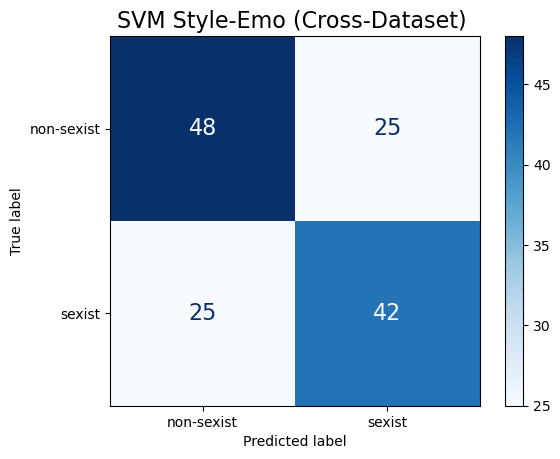

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo (Cross-Dataset) :

2025-06-24 16:34:42,681 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-06-24 16:34:42,691 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:42,705 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:34:42,706 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:42,719 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:42,731 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This i

In [28]:
y_dev = exist_dev["sexist"].to_numpy()
gold_path_dev_binary = "evaluation/overlapping_classes/golds/EXIST2024/EXIST2024_validation_binary.json"
evaluate_binary_classification(gold_path_dev_binary,dev_pred_json,
                               y_dev,y_pred_dev,
                               ["non-sexist","sexist"],
                               gold_dev_txt,dev_pred_txt,
                               model_name="SVM Style-Emo (Cross-Dataset) ")

In [29]:
#get stylometric emotion features
mami_test = get_stylometric_emotion_features(mami_test_df)
y_test = mami_test[["misogynous"]].to_numpy()
#make predictions on test data
y_pred_test = classify_data_emotion(mami_test, clf_svc, vec1, vec2, vec3)

Saved MAMI test split binary evaluation to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_MAMI_test_binary.json
Saved MAMI test split to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_MAMI_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report for SVM Style-Emo (Cross-Dataset):
                precision    recall  f1-score   support

non-misogynous       0.64      0.52      0.57       500
    misogynous       0.58      0.70      0.63       476

      accuracy                           0.60       976
     macro avg       0.61      0.61      0.60       976
  weighted avg       0.61      0.60      0.60       976

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Confusion matrix for SVM Style-Emo (Cross-Data

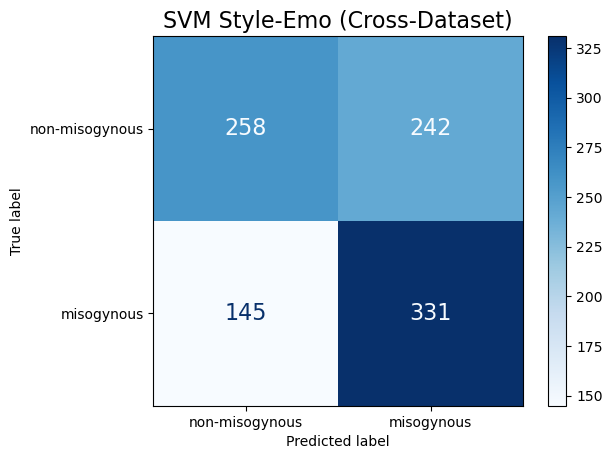

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
PyEvaLL Metrics for SVM Style-Emo (Cross-Dataset):

2025-06-24 16:34:43,594 - pyevall.evaluation - INFO -             evaluate() - Evaluating the following metrics ['ICM', 'ICMNorm', 'FMeasure']
2025-06-24 16:34:43,677 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:43,897 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:34:43,900 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:44,065 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:34:44,182 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is

In [30]:
gold_path_test_binary = "evaluation/overlapping_classes/golds/MAMI/MAMI_test_binary.json"
#create file with predictions
test_pred_json,test_pred_txt = save_evaluation(mami_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, y_pred_test, "misogynous", [])
#get evaluation metrics
evaluate_binary_classification(gold_path_test_binary,test_pred_json,
                               y_test,y_pred_test,
                               ["non-misogynous","misogynous"],
                               gold_test_txt,test_pred_txt,
                               model_name="SVM Style-Emo (Cross-Dataset)")

In [11]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(mami_test_df, y_pred_test, ["misogynous"], output_path)

Predictions saved to output/cross_dataset/MAMI/svm_stylometric_emotion_MAMI_test_binary.csv


## Multilabel Classification

### Hierarchical classification with ensemble in 1st step:

In [31]:
ds_name = "EXIST2024"
cross_ds_name = "MAMI"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_ensemble"
binary_label = "sexist"
binary_label_cross = "misogynous"
exist_fine_grained_labels = ["stereotyping-dominance","objectification", "sexual-violence"]
exist_label_names = ["sexist","stereotyping-dominance","objectification", "sexual-violence"]
mami_fine_grained_labels = ["stereotype","objectification", "violence"]
mami_label_names = ["misogynous","stereotype","objectification", "violence"]

In [32]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/cross_dataset/{cross_ds_name}/ensemble_svm_roberta_robertaswin_{cross_ds_name}_test_binary.csv")
y_pred_binary = binary_preds[f"{binary_label_cross}_prediction"].to_numpy()

In [33]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=exist_label_names)
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=exist_label_names)
mami_test = get_stylometric_emotion_features(mami_test_df,label_col=mami_label_names)

In [34]:
test_positive = mami_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label_cross: y_pred_binary}) 
pred_df[mami_fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = exist_train[exist_train[binary_label] == 1] #only the instances with positive class in binary level

clf=LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                exist_fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [35]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, mami_fine_grained_labels] = y_pred_multilabel.toarray() 

In [36]:
y_test_all = mami_test_df[mami_label_names]
gold_path_test_ml = f"evaluation/overlapping_classes/golds/{cross_ds_name}/{cross_ds_name}_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(mami_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, pred_df, binary_label_cross, mami_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   mami_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved MAMI test split hierarchical evaluation to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_w_ensemble_MAMI_test_hierarchical.json
Saved MAMI test split to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_w_ensemble_MAMI_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

 non-misogynous       0.73      0.61      0.67       500
     stereotype       0.53      0.52      0.53       350
objectification       0.52      0.57      0.54       348
       violence       0.20      0.12      0.15       153

      micro avg       0.57      0.52      0.55      1351
      macro avg       0.50      0.46      0.47      1351
   weighted avg       0.57      0.52      0.54      1351
    samples avg       0.58      0.54      0.55      1351

-----------------------------------------------------------------------

2025-06-24 16:35:32,922 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:33,092 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:35:33,093 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:33,232 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:33,374 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_MAMI_test_hierarchical.json	-0.36452908283341096	0.38438295242125453	0.4767485130075152

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_MAMI_test_hier

In [37]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}/ensemble_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(mami_test_df, pred_df.to_numpy(), mami_label_names, output_path)

Predictions saved to output/cross_dataset/MAMI/ensemble_first_step/svm_stylometric_emotion_w_ensemble_MAMI_test_hierarchical.csv


### Hierarchical classification with Ensemble w/ BERT in 1st step:

In [38]:
ds_name = "EXIST2024"
cross_ds_name = "MAMI"
evaluation_type = "hierarchical"
model_name = "svm_stylometric_emotion_w_ensemble_wbert"
binary_label = "sexist"
binary_label_cross = "misogynous"
exist_fine_grained_labels = ["stereotyping-dominance","objectification", "sexual-violence"]
exist_label_names = ["sexist","stereotyping-dominance","objectification", "sexual-violence"]
mami_fine_grained_labels = ["stereotype","objectification", "violence"]
mami_label_names = ["misogynous","stereotype","objectification", "violence"]

In [39]:
#load first-level binary predictions from ensemble
binary_preds = pd.read_csv(f"output/cross_dataset/{cross_ds_name}/ensemble_bert_roberta_robertaswin_{cross_ds_name}_test_binary.csv")
y_pred_binary = binary_preds[f"{binary_label_cross}_prediction"].to_numpy()

In [40]:
#get stylometric emotion features
exist_train = get_stylometric_emotion_features(exist_train_df,label_col=exist_label_names)
exist_dev = get_stylometric_emotion_features(exist_dev_df,label_col=exist_label_names)
mami_test = get_stylometric_emotion_features(mami_test_df,label_col=mami_label_names)

In [41]:
test_positive = mami_test.copy()
test_positive["binary_pred"] = y_pred_binary
test_positive = test_positive[test_positive["binary_pred"] == 1]

#initialize df with predictions for binary classification which will be populated with the categories
#default all fine-grained labels to 0
pred_df = pd.DataFrame({binary_label_cross: y_pred_binary}) 
pred_df[mami_fine_grained_labels] = 0

#only the instances with positive class at binary level will be use to train the fine-grained categories
train_bin_pos = exist_train[exist_train[binary_label] == 1] #only the instances with positive class in binary level

clf=LinearSVC(C=0.1, max_iter=30000, random_state=0)
multilabel_model,vec_tfidf1_, vec_tfidf2_, vec_char_ngram_ = create_multilabel_classifier_emotion(train_bin_pos,
                                                                                                exist_fine_grained_labels,
                                                                                                model=clf)

/Users/arianabritez/anaconda3/envs/thesis/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [42]:
y_pred_multilabel = classify_data_emotion(test_positive,
                                        multilabel_model,
                                        vec_tfidf1_, 
                                        vec_tfidf2_, 
                                        vec_char_ngram_, 
                                        ) #this only applies to those that were labelled as 1 in binary

#add fine-grained labels to the positive instances in the predictions df to get the labels for full dataset
pred_df.loc[y_pred_binary == 1, mami_fine_grained_labels] = y_pred_multilabel.toarray() 

In [43]:
y_test_all = mami_test_df[mami_label_names]
gold_path_test_ml = f"evaluation/overlapping_classes/golds/{cross_ds_name}/{cross_ds_name}_test_hierarchical.json"
#predict on test dataset
test_pred_json_ml,test_pred_txt_ml = save_evaluation(mami_test_df, "evaluation/overlapping_classes/predictions", cross_ds_name, "test", evaluation_type, model_name, pred_df, binary_label_cross, mami_label_names)
#get multi-label evaluation metrics
evaluate_multilabel_classification(gold_path_test_ml,test_pred_json_ml,
                                   y_test_all,pred_df.to_numpy(),
                                   mami_label_names,
                                   gold_test_txt,test_pred_txt_ml)

Saved MAMI test split hierarchical evaluation to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_w_ensemble_wbert_MAMI_test_hierarchical.json
Saved MAMI test split to evaluation/overlapping_classes/predictions/MAMI/svm_stylometric_emotion_w_ensemble_wbert_MAMI_test_answer.txt
----------------------------------------------------------------------------------------------------
Classification Report:
                 precision    recall  f1-score   support

 non-misogynous       0.75      0.63      0.68       500
     stereotype       0.53      0.53      0.53       350
objectification       0.52      0.57      0.55       348
       violence       0.19      0.12      0.15       153

      micro avg       0.58      0.53      0.55      1351
      macro avg       0.50      0.46      0.48      1351
   weighted avg       0.57      0.53      0.55      1351
    samples avg       0.60      0.56      0.56      1351

-----------------------------------------------------------

2025-06-24 16:35:41,056 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:41,196 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM Normalized evaluation method
2025-06-24 16:35:41,197 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:41,328 - pyevall.metrics.metrics - INFO -             evaluate() - Executing ICM evaluation method
2025-06-24 16:35:41,459 - pyevall.metrics.metrics - INFO -             evaluate() - Executing fmeasure evaluation method
This is a table PyEvALL report, so no warnings or errors are shown. Please, check the embedded report to check errors if any metric has the value "-" or is an empty value or table.
	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_wbert_MAMI_test_hierarchical.json	-0.33886433636713137	0.3925229948843255	0.4785804482999319

	files	ICM	ICM-Norm	F1
0	svm_stylometric_emotion_w_ensemble_wbert_MAM

In [10]:
#save predictions on test set
output_dir = f"output/cross_dataset/{cross_ds_name}/ensemble_w_bert_first_step" #create output directory
os.makedirs(output_dir, exist_ok=True)
output_path = f"{output_dir}/{model_name}_{cross_ds_name}_test_{evaluation_type}.csv"

save_predictions_csv(mami_test_df, pred_df.to_numpy(), mami_label_names, output_path)

Predictions saved to output/cross_dataset/MAMI/ensemble_w_bert_first_step/svm_stylometric_emotion_w_ensemble_wbert_MAMI_test_hierarchical.csv
